In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import keras

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

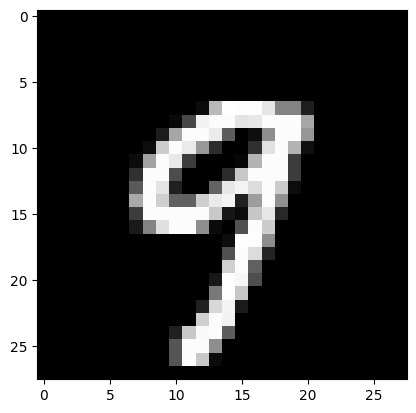

In [ ]:
plt.imshow(x_train[45],cmap='gray')

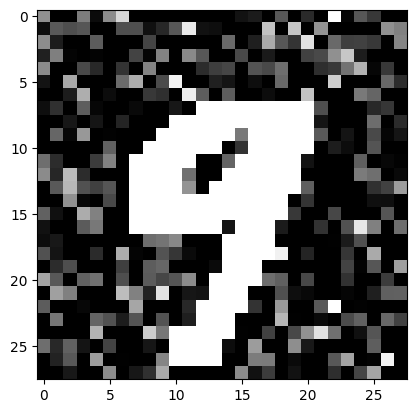

In [ ]:
plt.imshow(noise(x_train[45]),cmap='gray')

In [ ]:
# Create a copy of the data with added noise
noisy_train_data = noise(x_train)
noisy_test_data = noise(x_test)

In [ ]:
x_train = x_train.reshape(-1,28*28)/255
x_test = x_test.reshape(-1,28*28)/255
noisy_train_data=noisy_train_data.reshape(-1,28*28)/255
noisy_test_data=noisy_test_data.reshape(-1,28*28)/255

In [ ]:
model=Sequential()
model.add(keras.Input(shape=(28*28,)))
model.add(Dense(256,input_shape=(28*28,),activation='ReLU'))
model.add(Dense(128,input_shape=(28*28,),activation='ReLU'))
model.add(Dense(64,input_shape=(28*28,),activation='ReLU'))
model.add(Dense(128,input_shape=(28*28,),activation='ReLU'))
model.add(Dense(256,input_shape=(28*28,),activation='ReLU'))
model.add(Dense(28*28,activation='sigmoid'))#output
model.compile(optimizer = 'adam', loss = 'binary_crossentropy') 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
Total params: 484,944
Trainable params: 484,944
Non-trai

In [ ]:
res = model.fit(noisy_train_data,
          x_train,
          batch_size=20,
          epochs = 8,
          validation_data = (noisy_test_data,x_test))

Epoch 1/16
3000/3000 [==============================] - 21s 5ms/step - loss: 0.2098 - val_loss: 0.1662
Epoch 2/16
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1569 - val_loss: 0.1497
Epoch 3/16
3000/3000 [==============================] - 14s 5ms/step - loss: 0.1451 - val_loss: 0.1400
Epoch 4/16
3000/3000 [==============================] - 18s 6ms/step - loss: 0.1384 - val_loss: 0.1356
Epoch 5/16
3000/3000 [==============================] - 13s 4ms/step - loss: 0.1330 - val_loss: 0.1300
Epoch 6/16
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1277 - val_loss: 0.1257
Epoch 7/16
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1241 - val_loss: 0.1219
Epoch 8/16
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1206 - val_loss: 0.1194
Epoch 9/16
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1176 - val_loss: 0.1164
Epoch 10/16
3000/3000 [==============================] - 10s 3ms/step - l

In [ ]:
prd=model.predict(noisy_test_data)

313/313 [==============================] - 2s 5ms/step


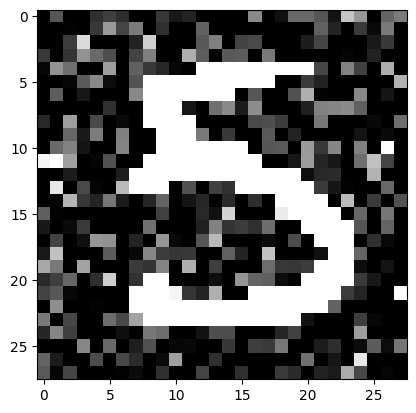

In [ ]:
plt.imshow(noisy_test_data[15].reshape(28, 28),cmap='gray')

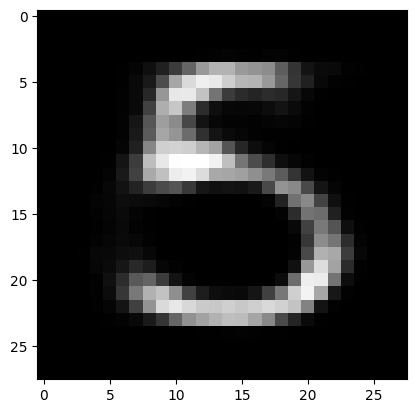

In [ ]:
plt.imshow(prd[15].reshape(28, 28),cmap='gray')

In [ ]:
model.save('/content/drive/MyDrive/saved/model_en_de.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored